Now, we want to use Chebyshev first kind node to do function approximaiton\
\
Define $T_k (x) = \cos(k\cos^{-1}(x)), f(x)=\frac{1}{1+10x^2}, x \in [-1, 1]$ 
\
\
To find $\underset{C_k}{\operatorname{argmin}}\Vert f(x) - \sum C_k T_k(x) \Vert$\
\
We obtain $C_k = \frac{<f, T_k>}{<T_k, T_k>}$, where the inner product operation is defined by $<f, g> = \int_{-1}^{1}\frac{1}{\sqrt{1+x^2}}f(x)g(x)dx$\
\
The next step is to compute $<f, T_k> = \int_{-1}^{1}\frac{1}{\sqrt{1+x^2}}f(x)\cos(k \cos^{-1}(x))dx$   and we change varible $x = \cos\theta$\
\
The integration becomes $\int_{0}^{\pi}f(\cos \theta) \cos(k\theta) d\theta$\
\
Similarly, $<T_k, T_k> = \int_{0}^{\pi}\cos^{2}(k\theta)d \theta$ $\quad$ (In fact, this value is $\frac{\pi}{2}$)\
\
The following code is covering one dimension case.\
\
Use the midpoint rule to compute the integration again and we obtain $C_k$ and then approximate the function.

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def midpoint_integration(f, N, d, x):
    # grid
    delta = (x[:, 1] - x[:, 0]) / N

    # midpoint
    midpoints = [np.linspace(x[i, 0] + delta[i] / 2, x[i, 1] - delta[i] / 2, N) for i in range(d)]

    # meshgrid
    mesh = np.meshgrid(*midpoints)
    points = np.vstack([m.flatten() for m in mesh]).T

    # value of midpoint
    if d == 1:
        function_values = np.array([f(point) for point in points])
    elif d == 2:
        function_values = np.array([f(point[0], point[1]) for point in points])
    elif d == 3:
        function_values = np.array([f(point[0], point[1], point[2]) for point in points])
    # calculate volume
    volume_element = np.prod(delta)

    # calculate integral
    integral = np.sum(function_values) * volume_element

    return integral

def function(x):
    return 1/(1 + 10*(x**2))

d = 1
x = np.array([[0, np.pi]])
k = range(0, 50, 1)
C_k = []
for i in k:    
    def function_chebyshev_1(theta):
        return function(np.cos(theta))* np.cos(i*theta)
    def function_chebyshev_2(theta):
        return np.cos(i*theta)**2
    inner_product_1 = midpoint_integration(function_chebyshev_1, 1000, d, x)
    inner_product_2 = midpoint_integration(function_chebyshev_2, 1000, d, x)
    C_k.append(inner_product_1/inner_product_2)
    # print(" Index = " , i , ':', inner_product_1/inner_product_2)

The maximum error is  2.2731921567320512e-07


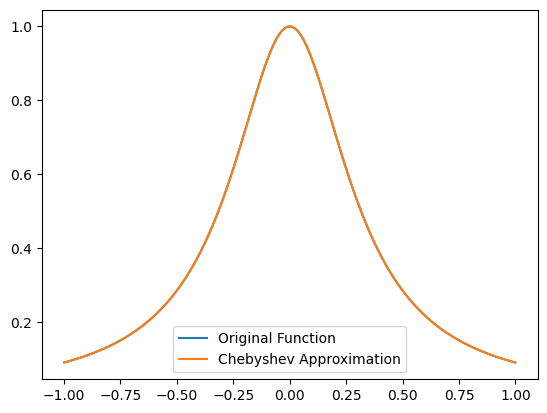

In [68]:
def T_k(k, x):
    return np.cos(k*np.arccos(x))

# Approximate the function using \sum C_k T_k(x)
def chebyshev_approximation(x, C_k):
    approximation = np.zeros_like(x)
    for k in range(len(C_k)):
        approximation += C_k[k] * T_k(k, x)
    return approximation

# Generate points for the original function and its approximation
x_values = np.linspace(-0.999, 0.999, 1000)
original_function_values = function(x_values)
approximation_values = chebyshev_approximation(x_values, C_k)

# Maximum error
max_error = np.max(np.abs(original_function_values-approximation_values))
print("The maximum error is ", max_error)

# Plot the original function and its approximation
plt.plot(x_values, original_function_values, label='Original Function')
plt.plot(x_values, approximation_values, label='Chebyshev Approximation')
plt.legend()
plt.show()

We can also use the Chebyshev polynomial to approximate the differential of the function.\
\
$f'(x) = \frac{-20x}{(1+10x^2)^2}$
\
\
$T_k'(x) = \frac{k\sin(k\cos^{-1}(x))}{\sqrt{1-x^2}}$

In [44]:
def diff_function(x):
    return -20*x/((1+10*x**2)**2)

The maximum error is  6.105703329445378e-05


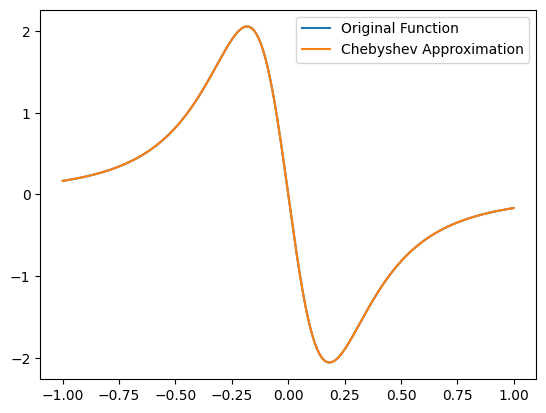

In [69]:
def diff_T_k(k, x):
    return k*np.sin(k*np.arccos(x))/(np.sqrt(1-x**2))

# Approximate the function using \sum C_k T_k(x)
def chebyshev_approximation(x, C_k):
    approximation = np.zeros_like(x)
    for k in range(len(C_k)):
        approximation += C_k[k] * diff_T_k(k, x)
    return approximation

# Generate points for the original function and its approximation
x_values = np.linspace(-0.999, 0.999, 1000)
original_function_values = diff_function(x_values)
approximation_values = chebyshev_approximation(x_values, C_k)

# Maximum error
max_error = np.max(np.abs(original_function_values-approximation_values))
print("The maximum error is ", max_error)

# Plot the original function and its approximation
plt.plot(x_values, original_function_values, label='Original Function')
plt.plot(x_values, approximation_values, label='Chebyshev Approximation')
plt.legend()
plt.show()

For two dimensional case, $f(x, y)= \frac{1}{10+x^2+y^2} = \sum_{i=0}^{n-1}\sum_{j=0}^{n-1} C_{i,j} T_i(x) T_j(y)$ \
\
$C_{k,l} = \frac{<f, T_k(x)T_l(y)>}{<T_k(x)T_k(x), T_l(y)T_l(y)>} = \frac{<f, T_k(x)T_l(y)>}{<T_k(x)T_k(x)> <T_l(y)T_l(y)>}$ \
\
$<f, T_k(x)T_l(y)>=\int_{0}^{\pi} \int_{0}^{\pi}f(\cos \theta_1, \cos \theta_2) \cos(k \theta_1) \cos(l \theta_2) d \theta_1 d \theta_2$\
\
$<T_k(x)T_k(x)> <T_l(y)T_l(y)> = \int_{0}^{\pi}\cos^{2}(k\theta_1)d \theta_1 \int_{0}^{\pi}\cos^{2}(l\theta_2)d \theta_2$
\
\
The process to get $C_{i,j}$ is similar to one dimesional case\
\
The following code covers the two dimensonal case

In [42]:
def f(x, y):
    return 1/(10+x**2+y**2)

d1 = 1
x1 = np.array([[0, np.pi]])
d2 = 2
x2 = np.array([[0, np.pi], [0, np.pi]]) 
k = range(0, 4, 1)
C_kl = []
# print("Result of using midpoint rule")
for i in k:    
    for j in k:
        def function_chebyshev_1(theta1, theta2):
            return f(np.cos(theta1), np.cos(theta2))*np.cos(i*theta1)*np.cos(j*theta2)
        def function_chebyshev_2(theta):
            return np.cos(i*theta)**2
        def function_chebyshev_3(theta):
            return np.cos(j*theta)**2
        inner_product_1 = midpoint_integration(function_chebyshev_1, 200, d2, x2)
        inner_product_2 = midpoint_integration(function_chebyshev_2, 100, d1, x1)
        inner_product_3 = midpoint_integration(function_chebyshev_3, 100, d1, x1)
        C_kl.append(inner_product_1/(inner_product_2*inner_product_3))
        # print(" Index = " , i , j,  ':', inner_product_1/(inner_product_2*inner_product_3))